## Setup

In [7]:
# import code
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier

In [1]:
# load dataset into a dataframe
import pandas as pd
data = pd.read_csv("cleaned_cope_data_randomized.csv", dtype={'b_bstad_me_30_days_8': 'str', 'b_bstad_me_90_days_6': 'str', 'b_bstad_me_90_days_8': 'str'})

## Data Set Info

In [4]:
# how many rows and columns in dataframe, can also use data.shape
data.info()

# to get more detail about specific range of columns
# data.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Columns: 534 entries, b_start_date to b_covid_symptoms_na
dtypes: float64(412), int64(59), object(63)
memory usage: 10.0+ MB


In [2]:
# more detail about columns of interest 
# eed scale is named differently with no b_
data[['b_uls_mean', 'b_cdi_mean', 'b_dem_sex', 'b_dem_gender', 'b_dem_orientation', 
'b_bads_mean', 'b_shs_mean' , 'b_bhs_mean', 'b_aces_mean' , 'b_mvps_mean',
'eds_events_mean', 'b_gad_mean', 'b_sitbi_2',  
'b_sitbi_8', 'b_sitbi_si_month_1', 'b_sitbi_nssi_month_1', 'b_sitbi_nssi_3months_1',
'b_sitbi_nssi_year_1', 'b_sitbi_nssi_life_1','b_sitbi_si_3month_1', 'b_sitbi_si_year_1', 
'b_sitbi_si_life_1', 'b_sitbi_plan_3month_1','b_sitbi_plan_year_1', 'b_sitbi_plan_life_1', 
'b_sitbi_attempt_3months_1', 'b_sitbi_attempt_year_1','b_sitbi_attempt_life_1',
'b_sitbi_11', 'b_sitbi_13', 'b_sitbi_16',
'b_sitbi_17', 'b_sitbi_20']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   b_uls_mean                 2449 non-null   float64
 1   b_cdi_mean                 2452 non-null   float64
 2   b_dem_sex                  2452 non-null   object 
 3   b_dem_gender               2452 non-null   object 
 4   b_dem_orientation          2452 non-null   object 
 5   b_bads_mean                2451 non-null   float64
 6   b_shs_mean                 2452 non-null   float64
 7   b_bhs_mean                 2451 non-null   float64
 8   b_aces_mean                2451 non-null   float64
 9   b_mvps_mean                2450 non-null   float64
 10  eds_events_mean            2449 non-null   float64
 11  b_gad_mean                 2447 non-null   float64
 12  b_sitbi_2                  2451 non-null   float64
 13  b_sitbi_8                  2452 non-null   int64

#### list of variables with missing values  
missing most:  
b_sitbi_attempt_3months_1  
b_sitbi_attempt_year_1     
b_sitbi_attempt_life_1  
b_sitbi_20  

missing a third:  
15  b_sitbi_nssi_month_1       1600 non-null   float64  
16  b_sitbi_nssi_3months_1     1602 non-null   float64  
17  b_sitbi_nssi_year_1        1604 non-null   float64  
18  b_sitbi_nssi_life_1        1601 non-null   float64  
19  b_sitbi_si_3month_1        1957 non-null   float64  
20  b_sitbi_si_year_1          1955 non-null   float64  
21  b_sitbi_si_life_1          1944 non-null   float64  
22  b_sitbi_plan_3month_1      1624 non-null   float64  
23  b_sitbi_plan_year_1        1624 non-null   float64  
24  b_sitbi_plan_life_1        1616 non-null   float64  
30  b_sitbi_16                 1650 non-null   float64

In [ ]:
#identifying missing data
missing_values_count = data[['b_uls_mean', 'b_cdi_mean', 'b_dem_sex', 'b_dem_gender', 'b_dem_orientation', 
'b_bads_mean', 'b_shs_mean' , 'b_bhs_mean', 'b_aces_mean' , 'b_mvps_mean',
'eds_events_mean', 'b_gad_mean', 'b_sitbi_2',  
'b_sitbi_8', 'b_sitbi_si_month_1', 'b_sitbi_nssi_month_1', 'b_sitbi_nssi_3months_1',
'b_sitbi_nssi_year_1', 'b_sitbi_nssi_life_1','b_sitbi_si_3month_1', 'b_sitbi_si_year_1', 
'b_sitbi_si_life_1', 'b_sitbi_plan_3month_1','b_sitbi_plan_year_1', 'b_sitbi_plan_life_1', 
'b_sitbi_attempt_3months_1', 'b_sitbi_attempt_year_1','b_sitbi_attempt_life_1',
'b_sitbi_11', 'b_sitbi_13', 'b_sitbi_16',
'b_sitbi_17', 'b_sitbi_20']].isnull().sum()

missing_values_count


In [5]:
# preview columns of interest
data[['b_uls_mean', 'b_cdi_mean', 'b_dem_sex', 'b_dem_gender', 'b_dem_orientation', 
'b_bads_mean', 'b_shs_mean' , 'b_bhs_mean', 'b_aces_mean' , 'b_mvps_mean',
'eds_events_mean', 'b_gad_mean', 'b_sitbi_2']].head() 

,b_uls_mean,b_cdi_mean,b_dem_sex,b_dem_gender,b_dem_orientation,b_bads_mean,b_shs_mean,b_bhs_mean,b_aces_mean,b_mvps_mean,eds_events_mean,b_gad_mean,b_sitbi_2
0,2.25,1.750000,Female,Woman/Girl,Heterosexual/Straight,2.888889,2.166667,2.75,0.6,0.8750,2.9,2.428571,1.0
1,1.90,1.166667,Female,Woman/Girl,Bisexual,3.555556,3.833333,1.75,0.4,0.0000,3.4,3.142857,1.0
2,1.80,0.750000,Male,Not sure,Queer,2.444444,2.833333,1.75,0.8,0.2500,3.2,2.571429,1.0
3,2.15,0.916667,Female,Woman/Girl,Heterosexual/Straight,3.111111,4.333333,1.75,0.8,0.3125,2.3,2.857143,0.0
4,1.70,0.583333,Female,Woman/Girl,Heterosexual/Straight,2.222222,3.333333,1.00,0.2,0.0000,1.6,1.571429,0.0


In [6]:
# how many unique value per feature
for c in ['b_uls_mean', 'b_cdi_mean', 'b_dem_sex', 'b_dem_gender', 'b_dem_orientation', 
'b_bads_mean', 'b_shs_mean' , 'b_bhs_mean', 'b_aces_mean' , 'b_mvps_mean',
'eds_events_mean', 'b_gad_mean', 'b_sitbi_2']:
    print(len(data[c].unique()), "unique values in column", c)

41 unique values in column b_uls_mean
27 unique values in column b_cdi_mean
4 unique values in column b_dem_sex
189 unique values in column b_dem_gender
10 unique values in column b_dem_orientation
49 unique values in column b_bads_mean
45 unique values in column b_shs_mean
14 unique values in column b_bhs_mean
9 unique values in column b_aces_mean
36 unique values in column b_mvps_mean
51 unique values in column eds_events_mean
23 unique values in column b_gad_mean
3 unique values in column b_sitbi_2


## Subset Data Set for Analysis

In [43]:
# define target variable and extract it from the data
target_column = "b_sitbi_2"
target = data[target_column]

In [44]:
# check balance of target
target.value_counts()

1.0    1653
0.0     798
Name: b_sitbi_2, dtype: int64

In [3]:
# separately extract numeric and categorical data of interest
numeric_columns = ['b_uls_mean', 'b_cdi_mean', 'b_bads_mean', 'b_shs_mean' , 'b_bhs_mean', 'b_aces_mean' , 'b_mvps_mean',
'eds_events_mean', 'b_gad_mean']
data_numeric = data[numeric_columns]
categorical_columns = ['b_dem_sex', 'b_dem_gender', 'b_dem_orientation']
data_categorical = data[categorical_columns]

In [4]:
# create data set with only variables of interest
model_data = pd.concat([data_numeric, data_categorical, target], axis=1)

In [5]:
# drop samples missing the target
model_data = model_data[model_data['b_sitbi_2'].notna()]
target = model_data[target_column]
model_data.drop(columns = [target_column])

,b_uls_mean,b_cdi_mean,b_bads_mean,b_shs_mean,b_bhs_mean,b_aces_mean,b_mvps_mean,eds_events_mean,b_gad_mean,b_dem_sex,b_dem_gender,b_dem_orientation
0,2.25,1.750000,2.888889,2.166667,2.75,0.6,0.8750,2.9,2.428571,Female,Woman/Girl,Heterosexual/Straight
1,1.90,1.166667,3.555556,3.833333,1.75,0.4,0.0000,3.4,3.142857,Female,Woman/Girl,Bisexual
2,1.80,0.750000,2.444444,2.833333,1.75,0.8,0.2500,3.2,2.571429,Male,Not sure,Queer
3,2.15,0.916667,3.111111,4.333333,1.75,0.8,0.3125,2.3,2.857143,Female,Woman/Girl,Heterosexual/Straight
4,1.70,0.583333,2.222222,3.333333,1.00,0.2,0.0000,1.6,1.571429,Female,Woman/Girl,Heterosexual/Straight
...,...,...,...,...,...,...,...,...,...,...,...,...
2447,2.05,1.083333,3.111111,3.000000,2.25,0.4,0.5000,2.6,3.142857,Female,Other (please specify),Asexual
2448,1.95,0.666667,3.444444,4.000000,0.50,0.6,0.2500,1.0,2.285714,Female,Woman/Girl,Heterosexual/Straight
2449,1.90,1.500000,3.222222,2.000000,2.75,1.0,0.1250,2.9,3.142857,Female,"Transgender,Female to male transgender/FTM,Tra...",Unsure/Questioning
2450,2.10,1.750000,2.000000,1.833333,2.00,1.0,1.0625,3.0,3.571429,Male,Man/Boy,Bisexual


In [19]:
model_data.head()

,b_uls_mean,b_cdi_mean,b_bads_mean,b_shs_mean,b_bhs_mean,b_aces_mean,b_mvps_mean,eds_events_mean,b_gad_mean,b_dem_sex,b_dem_gender,b_dem_orientation
0,2.25,1.750000,2.888889,2.166667,2.75,0.6,0.8750,2.9,2.428571,Female,Woman/Girl,Heterosexual/Straight
1,1.90,1.166667,3.555556,3.833333,1.75,0.4,0.0000,3.4,3.142857,Female,Woman/Girl,Bisexual
2,1.80,0.750000,2.444444,2.833333,1.75,0.8,0.2500,3.2,2.571429,Male,Not sure,Queer
3,2.15,0.916667,3.111111,4.333333,1.75,0.8,0.3125,2.3,2.857143,Female,Woman/Girl,Heterosexual/Straight
4,1.70,0.583333,2.222222,3.333333,1.00,0.2,0.0000,1.6,1.571429,Female,Woman/Girl,Heterosexual/Straight


## Exploring Data Set

In [7]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='b_gad_mean', ylabel='Count'>

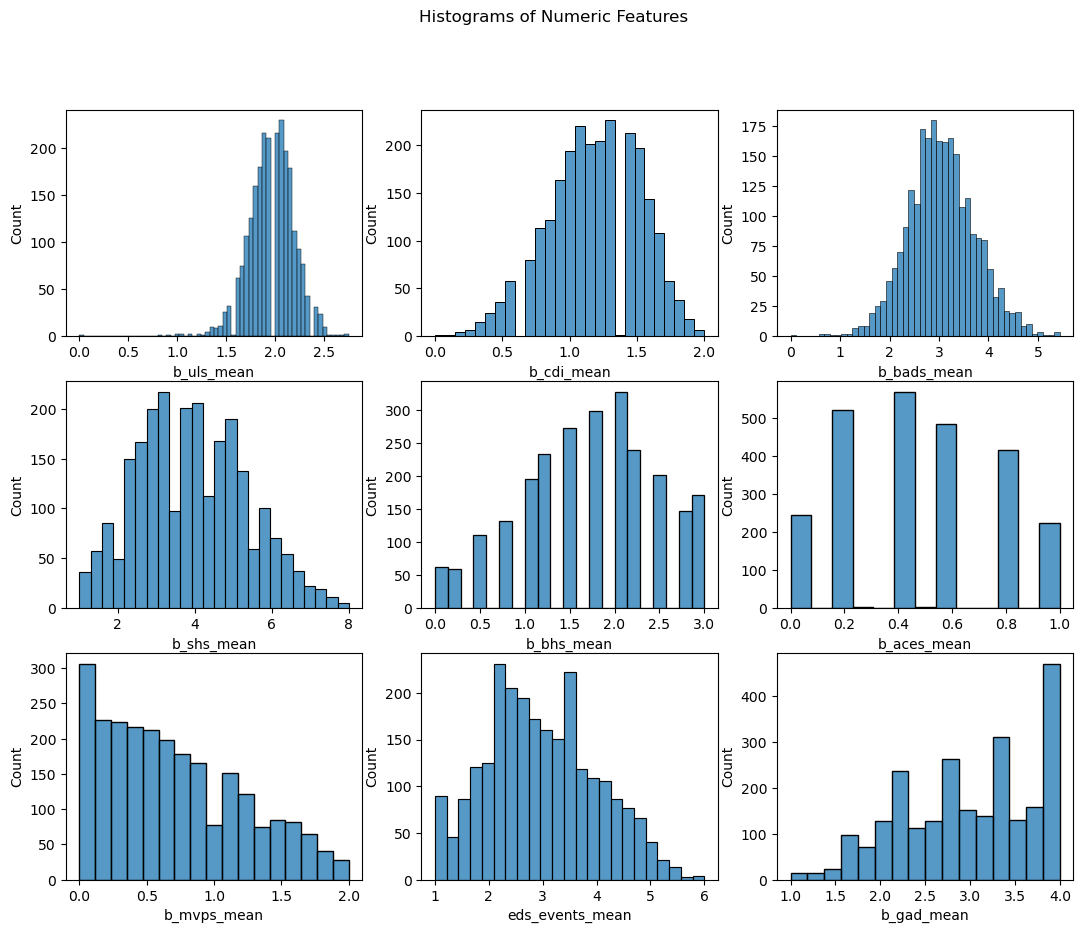

In [25]:
# histograms of numeric features
fig, axes = plt.subplots(3, 3, figsize=(13, 10))
fig.suptitle('Histograms of Numeric Features')

sns.histplot(ax=axes[0, 0], data=model_data['b_uls_mean'])
sns.histplot(ax=axes[0, 1], data=model_data['b_cdi_mean'])
sns.histplot(ax=axes[0, 2], data=model_data['b_bads_mean'])
sns.histplot(ax=axes[1, 0], data=model_data['b_shs_mean'])
sns.histplot(ax=axes[1, 1], data=model_data['b_bhs_mean'])
sns.histplot(ax=axes[1, 2], data=model_data['b_aces_mean'])
sns.histplot(ax=axes[2, 0], data=model_data['b_mvps_mean'])
sns.histplot(ax=axes[2, 1], data=model_data['eds_events_mean'])
sns.histplot(ax=axes[2, 2], data=model_data['b_gad_mean'])

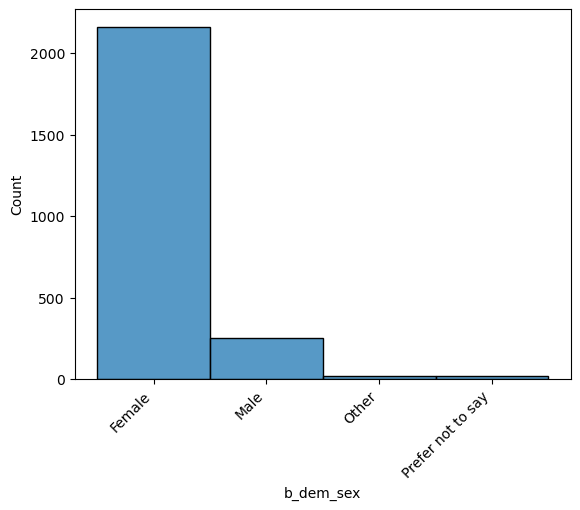

In [34]:
# countplots of categorical features
sns.histplot(model_data['b_dem_sex'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right' 
)

# don't show the label objects
None

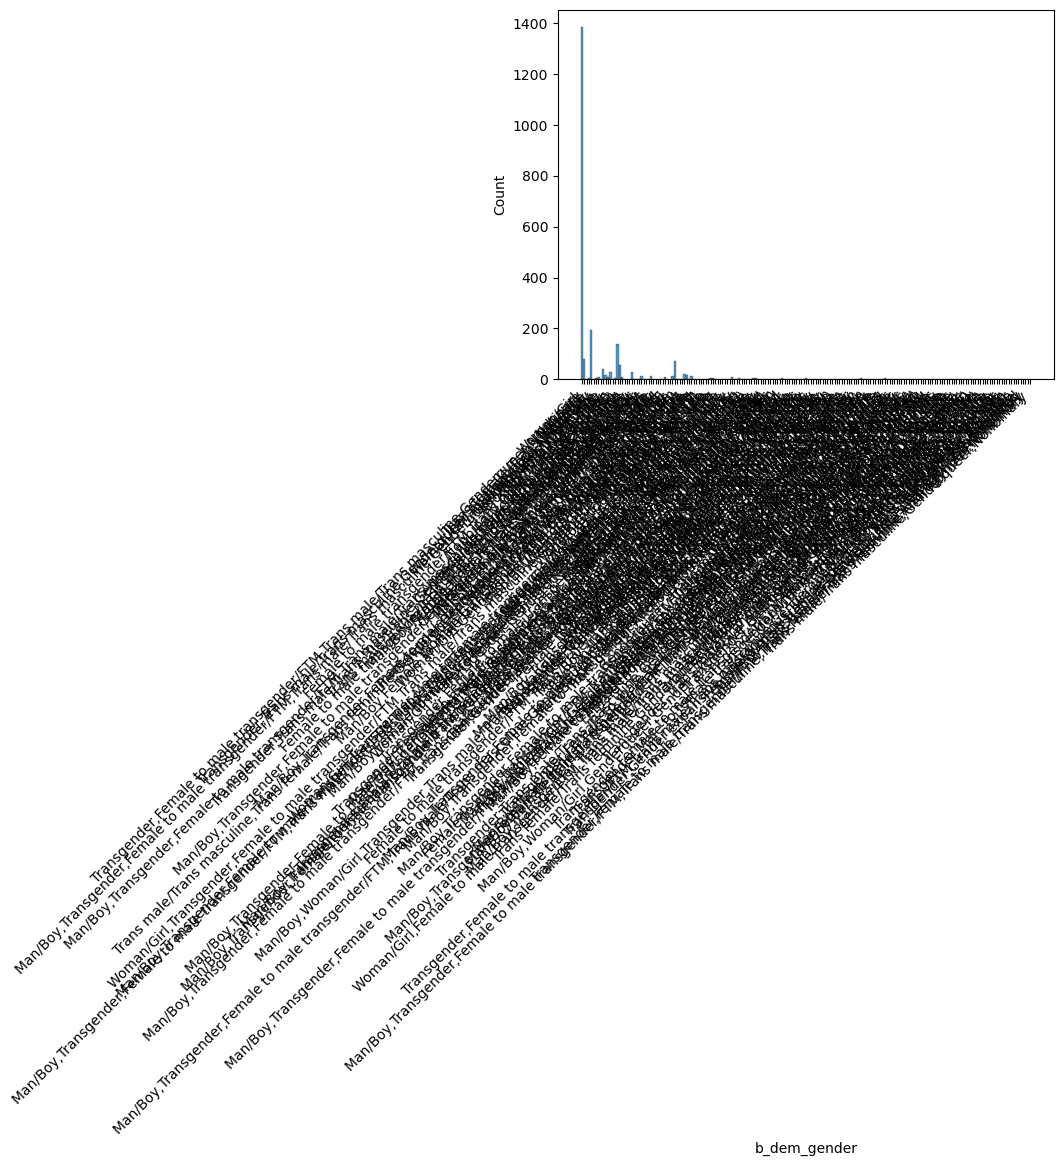

In [32]:
sns.histplot(model_data['b_dem_gender'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right' 
)
None

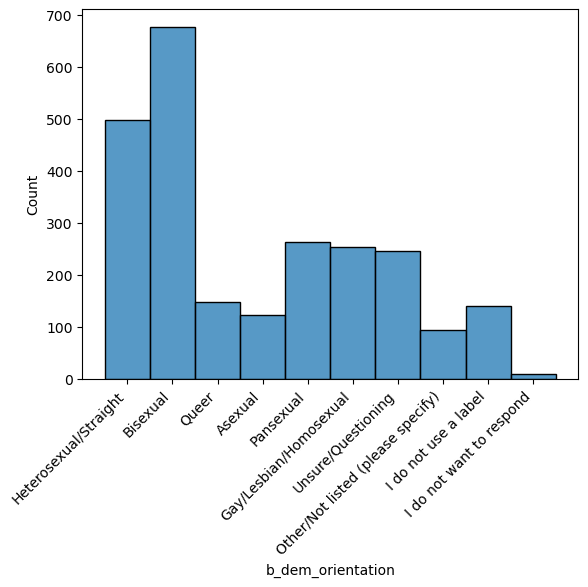

In [35]:
sns.histplot(model_data['b_dem_orientation'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right' 
)
None

In [47]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2452 entries, 0 to 2451
Series name: b_sitbi_2
Non-Null Count  Dtype  
--------------  -----  
2451 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


Text(0.5, 0.98, 'b_sitbi_2 counts')

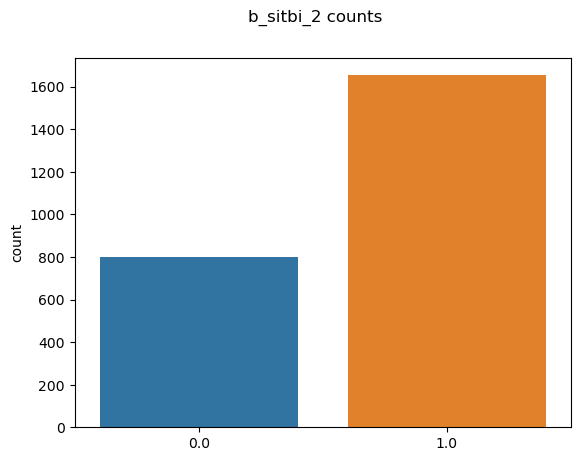

In [53]:
# countplot of target
sns.countplot(data=target, x=target.values)
plt.suptitle('b_sitbi_2 counts')

In [51]:
# target category percentages
target.value_counts(normalize=True)*100

1.0    67.44186
0.0    32.55814
Name: b_sitbi_2, dtype: float64

## Initial Random Forest Model

In [14]:
preprocessor = ColumnTransformer([
    ('categorical', OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1), categorical_columns),
    ('numerical', SimpleImputer(strategy = 'mean' ) , numeric_columns) ])

model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=0))

In [15]:
# model is actually run 
cv_results = cross_validate(model, model_data, target)

In [11]:
print("The mean accuracy with cross-validation is: " 
      f"{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}") 

The mean accuracy with cross-validation is: 0.713 +/- 0.006


In [17]:
#identify which target value is most common in the SI target variable and see how accurate it is
dummy_results = cross_validate(DummyClassifier(), model_data, target)
print("The mean accuracy with cross-validation is: " 
      f"{dummy_results['test_score'].mean():.3f} +/- {dummy_results['test_score'].std():.3f}") 

The mean accuracy with cross-validation is: 0.674 +/- 0.001


## Some code for random forest classifier for later

### Optimizing model parameters

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
#Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. 
#I took the best model from this and did a more granular search 
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

In [ ]:
import matplotlib.pyplot as plt
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')